In [ ]:
!pip install pyspark findspark

import findspark #para que Python encuentre PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import os

#Configurar Spark para que encuentre el entorno
findspark.init()

#Crear sesión

spark=SparkSession.builder \
    .appName("AnalisisVentas") \
    .getOrCreate()

#Verificar que la sesión se haya creado exitosamente
print("SparkSesion creada con éxito")

data=[("Producto A", 100, 15.50, "2023-01-01"),
      ("Producto B", 50, 20.00, "2023-01-01"),
      ("Producto C", 150, 5.00, "2023-01-02"),
      ("Producto A", 20, 15.50, "2023-01-02"),
      ("Producto B", 75, 20.00, "2023-01-03"),
      ("Producto A", 125, 15.50, "2023-01-04"),
      ("Producto C", 200, 5.00, "2023-01-04")
       ]

columnas=["producto", "cantidad", "precio", "fecha"]

#Convertir en un DF de PySpark

df_ventas=spark.createDataFrame(data, columnas)

#Mostrar el contenido del DF
print("Contenido del DF de ventas")
df_ventas.show()

#Filtrado y Agrupamiento
#Filtrar solo las filas donde la columna 'producto' es igual a 'Producto A
df_producto_a=df_ventas.filter(df_ventas.producto=="Producto A")

print("DataFrame filtado para 'Producto A':")
df_producto_a.show()

#Agrupar los datos del 'Producto A' por columna 'fecha' y sumar la columna 'cantidad'
df_agrupado = df_producto_a.groupBy('fecha').sum('cantidad')

print('Ventas totales del "Producto A" por fecha: ')
df_agrupado.show()

#Crear columna ingresos
df_ingresos = df_ventas.withColumn('ingresos', col('cantidad') * col('precio'))

print('DF con la columna "ingresos"')
df_ingresos.show()

#Agrupar el DF por la columna 'producto' y sumar la nueva columna ingresos
df_ingresos_totales = df_ingresos.groupBy('producto').sum('ingresos')

print('Ingresos totales por cada producto')
df_ingresos_totales.show()

#Renombrar la columna de suma
df_ingresos_totales = df_ingresos_totales.withColumnRenamed('sum(ingresos)', 'ingresos totales')

print('DF con el nuevo nombre de la columna')
df_ingresos_totales.show()

#Guardar el DF df_ingresos_totales en un archivo csv
df_ingresos_totales.write.mode('overwrite').option('header', 'true').csv('ingresos_totales_por_producto.csv')

print('Resultados guardados exitosamente')

SparkSesion creada con éxito
Contenido del DF de ventas
+----------+--------+------+----------+
|  producto|cantidad|precio|     fecha|
+----------+--------+------+----------+
|Producto A|     100|  15.5|2023-01-01|
|Producto B|      50|  20.0|2023-01-01|
|Producto C|     150|   5.0|2023-01-02|
|Producto A|      20|  15.5|2023-01-02|
|Producto B|      75|  20.0|2023-01-03|
|Producto A|     125|  15.5|2023-01-04|
|Producto C|     200|   5.0|2023-01-04|
+----------+--------+------+----------+

DataFrame filtado para 'Producto A':
+----------+--------+------+----------+
|  producto|cantidad|precio|     fecha|
+----------+--------+------+----------+
|Producto A|     100|  15.5|2023-01-01|
|Producto A|      20|  15.5|2023-01-02|
|Producto A|     125|  15.5|2023-01-04|
+----------+--------+------+----------+

Ventas totales del "Producto A" por fecha: 
+----------+-------------+
|     fecha|sum(cantidad)|
+----------+-------------+
|2023-01-01|          100|
|2023-01-04|          125|
|2023-

In [ ]:
import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, avg

findspark.init()

spark = SparkSession.builder.appName('AnalisisAppMovil').getOrCreate()

print('SparkSession creada con exito.')

SparkSession creada con exito.


In [ ]:
data = [('user_1', 'Android', 120),
        ('user_2', 'iOS', 300),
        ('user_3', 'Android', 150),
        ('user_4', 'iOS', 250),
        ('user_5', 'Android', 90),
        ('user_6', 'iOS', 400),
        ('user_7', 'Android', 180),
        ('user_8', 'iOS', 220)]

columns = ['user_ID', 'OS', 'session_duration']

df_app = spark.createDataFrame(data, columns)

Contenido del DF inicial


DataFrame[user_ID: string, OS: string, session_duration: bigint]

### Ejercicio

In [ ]:
!pip install pyspark findspark

import findspark
from pyspark.sql import SparkSession

findspark.init()
spark = SparkSession.builder.appName('AnalisisTransacciones').getOrCreate()
spark_context = spark.sparkContext

print('Spark y SparkContext creados exitosamente')

Spark y SparkContext creados exitosamente


In [ ]:
datos_csv = spark_context.parallelize([
    'id,usuario,monto,fecha,categoria',
    '1,Juan,1500,2025-03-10,Supermercado',
    '2,Ana,2000,2025-03-12,Tecnología',
    '3,Carlos,500,2025-03-12,Supermercado',
    '4,Juan,3000,2025-03-13,Tecnología',
    '5,Ana,700,2025-03-14,Restaurante'
])

header = datos_csv.first()
header

'id,usuario,monto,fecha,categoria'

In [ ]:
rdd_without_header = datos_csv.filter(lambda x: x != header)
rdd_without_header.collect()

['1,Juan,1500,2025-03-10,Supermercado',
 '2,Ana,2000,2025-03-12,Tecnología',
 '3,Carlos,500,2025-03-12,Supermercado',
 '4,Juan,3000,2025-03-13,Tecnología',
 '5,Ana,700,2025-03-14,Restaurante']

In [ ]:
rdd_transactions = rdd_without_header.map(lambda x: x.split(',')).map(lambda x: (x[1], float(x[2])))
rdd_transactions.collect()

[('Juan', 1500.0),
 ('Ana', 2000.0),
 ('Carlos', 500.0),
 ('Juan', 3000.0),
 ('Ana', 700.0)]

In [ ]:
rdd_filter = rdd_transactions.filter(lambda x: x[1] > 1000)
rdd_filter.collect()

[('Juan', 1500.0), ('Ana', 2000.0), ('Juan', 3000.0)]

In [ ]:
rdd_spend = rdd_transactions.reduceByKey(lambda x, y: x + y)
rdd_spend.collect()

[('Juan', 4500.0), ('Ana', 2700.0), ('Carlos', 500.0)]

In [ ]:
rdd_top_3 = rdd_spend.sortBy(lambda x: x[1], ascending = False).take(3)
print('Los 3 usuarios con mayores gastos son:')
rdd_top_3

Los 3 usuarios con mayores gastos son:


[('Juan', 4500.0), ('Ana', 2700.0), ('Carlos', 500.0)]

In [ ]:
rdd_amounts = rdd_transactions.map(lambda x: x[1])
sum = rdd_amounts.sum()
mean = rdd_amounts.mean()
std = rdd_amounts.stdev()
print(f'La de los montos totales: {sum:.2f}. \nLa media de los montos totales: {mean:.2f}.\nLa desviacion estandar de los montos: {std:.2f}')

La de los montos totales: 7700.00. 
La media de los montos totales: 1540.00.
La desviacion estandar de los montos: 909.07


### Ejercicio

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris-flower-dataset' dataset.
Path to dataset files: /kaggle/input/iris-flower-dataset


In [ ]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'IRIS.csv')

In [ ]:
findspark.init()

spark = SparkSession.builder.appName('MLlib_Iris').getOrCreate()

data = spark.read.csv(dataset_path, header = True, inferSchema = True)
data.show(5)

+------------+-----------+------------+-----------+-----------+
|sepal_length|sepal_width|petal_length|petal_width|    species|
+------------+-----------+------------+-----------+-----------+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|
+------------+-----------+------------+-----------+-----------+
only showing top 5 rows



In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql.functions import when, col

data.select('species').distinct().show()

+---------------+
|        species|
+---------------+
| Iris-virginica|
|    Iris-setosa|
|Iris-versicolor|
+---------------+



In [ ]:
data = data.withColumn('label', when(col('species') == 'Iris-setosa', 0).when(col('species') == 'Iris-versicolor', 1).otherwise(2))
data.show(5)

+------------+-----------+------------+-----------+-----------+-----+
|sepal_length|sepal_width|petal_length|petal_width|    species|label|
+------------+-----------+------------+-----------+-----------+-----+
|         5.1|        3.5|         1.4|        0.2|Iris-setosa|    0|
|         4.9|        3.0|         1.4|        0.2|Iris-setosa|    0|
|         4.7|        3.2|         1.3|        0.2|Iris-setosa|    0|
|         4.6|        3.1|         1.5|        0.2|Iris-setosa|    0|
|         5.0|        3.6|         1.4|        0.2|Iris-setosa|    0|
+------------+-----------+------------+-----------+-----------+-----+
only showing top 5 rows



In [ ]:
features_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
assembler = VectorAssembler(inputCols = features_columns, outputCol = 'features')
data = assembler.transform(data)
data = data.select('features', 'label')
data.show(5)

+-----------------+-----+
|         features|label|
+-----------------+-----+
|[5.1,3.5,1.4,0.2]|    0|
|[4.9,3.0,1.4,0.2]|    0|
|[4.7,3.2,1.3,0.2]|    0|
|[4.6,3.1,1.5,0.2]|    0|
|[5.0,3.6,1.4,0.2]|    0|
+-----------------+-----+
only showing top 5 rows



In [ ]:
from pyspark.ml.classification import LogisticRegression

train, test = data.randomSplit([0.8, 0.2], seed = 42)

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter = 10)
model = lr.fit(train)
pred = model.transform(test)
pred.select('label', 'prediction').show()

+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    1|       1.0|
|    1|       1.0|
|    1|       1.0|
|    2|       2.0|
|    1|       1.0|
|    2|       2.0|
|    2|       2.0|
+-----+----------+
only showing top 20 rows



In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol = 'label', metricName = 'accuracy')
accuracy = evaluator.evaluate(pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [ ]:
from pyspark.ml.clustering import KMeans

kmeans = KMeans(featuresCol = 'features', k = 3)
model = kmeans.fit(train)
pred = model.transform(test)
pred.show()

+-----------------+-----+----------+
|         features|label|prediction|
+-----------------+-----+----------+
|[4.4,3.0,1.3,0.2]|    0|         1|
|[4.6,3.2,1.4,0.2]|    0|         1|
|[4.6,3.6,1.0,0.2]|    0|         1|
|[4.8,3.1,1.6,0.2]|    0|         1|
|[4.9,3.1,1.5,0.1]|    0|         1|
|[5.0,2.3,3.3,1.0]|    1|         2|
|[5.0,3.5,1.3,0.3]|    0|         1|
|[5.1,3.5,1.4,0.2]|    0|         1|
|[5.3,3.7,1.5,0.2]|    0|         1|
|[5.4,3.0,4.5,1.5]|    1|         2|
|[5.4,3.4,1.5,0.4]|    0|         1|
|[5.4,3.7,1.5,0.2]|    0|         1|
|[5.4,3.9,1.7,0.4]|    0|         1|
|[5.5,2.5,4.0,1.3]|    1|         2|
|[5.6,2.9,3.6,1.3]|    1|         2|
|[5.7,2.9,4.2,1.3]|    1|         2|
|[5.8,2.7,5.1,1.9]|    2|         2|
|[6.3,2.5,4.9,1.5]|    1|         2|
|[6.4,3.1,5.5,1.8]|    2|         0|
|[6.5,3.0,5.2,2.0]|    2|         0|
+-----------------+-----+----------+
only showing top 20 rows



In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path)

100%|██████████| 98.0k/98.0k [00:00<00:00, 44.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rajyellow46/wine-quality/versions/1


In [ ]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'winequalityN.csv')

In [ ]:
!pip install pyspark findspark

import findspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col, concat_ws, split
from pyspark.ml.feature import VectorAssembler, StandardScaler, CountVectorizer, IDF, StopWordsRemover, StringIndexer, OneHotEncoder
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.clustering import KMeans, LDA
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml import Pipeline

Exception ignored in: <function JavaWrapper.__del__ at 0x7d529efac860>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/pyspark/ml/wrapper.py", line 53, in __del__
    if SparkContext._active_spark_context and self._java_obj is not None:
                                              ^^^^^^^^^^^^^^
AttributeError: 'MulticlassClassificationEvaluator' object has no attribute '_java_obj'


In [ ]:
findspark.init()

spark_session = SparkSession.builder.appName('WineQualityML').getOrCreate()

print('La sesion se he ejecutado exitosamente')

La sesion se he ejecutado exitosamente


In [ ]:
df = spark_session.read.csv(dataset_path, header = True, inferSchema = True)
df.printSchema()

root
 |-- type: string (nullable = true)
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



In [ ]:
df.show(5)

+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
| type|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|white|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|
|white|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|
|white|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|
|white|          7.2|            0.23|       0.32|           8.5

In [ ]:
df.withColumnRenamed('quality', 'label').show(5)

+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-----+
| type|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|label|
+-----+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-----+
|white|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|    6|
|white|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|    6|
|white|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|    6|
|white|          7.2|            0.23|       0.32|           8.5|    0.058| 

In [ ]:
features_columns = df.columns[:-1]
features_columns

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [ ]:
df = df.withColumnRenamed('quality', 'label')

In [ ]:
for column in df.columns:
  count = df.filter(col(column).isNull()).count()
  print(f'La columna {column} tiene {count} valores nulos')

La columna type tiene 0 valores nulos
La columna fixed acidity tiene 10 valores nulos
La columna volatile acidity tiene 8 valores nulos
La columna citric acid tiene 3 valores nulos
La columna residual sugar tiene 2 valores nulos
La columna chlorides tiene 2 valores nulos
La columna free sulfur dioxide tiene 0 valores nulos
La columna total sulfur dioxide tiene 0 valores nulos
La columna density tiene 0 valores nulos
La columna pH tiene 9 valores nulos
La columna sulphates tiene 4 valores nulos
La columna alcohol tiene 0 valores nulos
La columna label tiene 0 valores nulos


In [ ]:
df = df.dropna()

for column in df.columns:
  count = df.filter(col(column).isNull()).count()
  print(f'La columna {column} tiene {count} valores nulos')

La columna type tiene 0 valores nulos
La columna fixed acidity tiene 0 valores nulos
La columna volatile acidity tiene 0 valores nulos
La columna citric acid tiene 0 valores nulos
La columna residual sugar tiene 0 valores nulos
La columna chlorides tiene 0 valores nulos
La columna free sulfur dioxide tiene 0 valores nulos
La columna total sulfur dioxide tiene 0 valores nulos
La columna density tiene 0 valores nulos
La columna pH tiene 0 valores nulos
La columna sulphates tiene 0 valores nulos
La columna alcohol tiene 0 valores nulos
La columna label tiene 0 valores nulos


In [ ]:
indexer = StringIndexer(inputCol = 'type', outputCol = 'type_index')
df_index = indexer.fit(df).transform(df)
df_index.select('type', 'type_index').show(5)
ohe = OneHotEncoder(inputCol = 'type_index', outputCol = 'type_vector')
df_ohe = ohe.fit(df_index).transform(df_index)
df_ohe.select('type', 'type_index', 'type_vector').show(5)

+-----+----------+
| type|type_index|
+-----+----------+
|white|       0.0|
|white|       0.0|
|white|       0.0|
|white|       0.0|
|white|       0.0|
+-----+----------+
only showing top 5 rows

+-----+----------+-------------+
| type|type_index|  type_vector|
+-----+----------+-------------+
|white|       0.0|(1,[0],[1.0])|
|white|       0.0|(1,[0],[1.0])|
|white|       0.0|(1,[0],[1.0])|
|white|       0.0|(1,[0],[1.0])|
|white|       0.0|(1,[0],[1.0])|
+-----+----------+-------------+
only showing top 5 rows



In [ ]:
first_col = df_ohe.columns[0]
df_ohe = df.drop(first_col)
features_columns_new = df_ohe.columns
features_columns_new

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'label']

In [ ]:
assembler = VectorAssembler(inputCols = features_columns_new, outputCol = 'features')
df_assemble = assembler.transform(df_ohe)
df_assemble.select('features').show(5, truncate = False)

+------------------------------------------------------------+
|features                                                    |
+------------------------------------------------------------+
|[7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0]|
|[6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0]  |
|[8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0] |
|[7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6.0]|
|[7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.4,9.9,6.0]|
+------------------------------------------------------------+
only showing top 5 rows



In [ ]:
ss = StandardScaler(inputCol = 'features', outputCol = 'features_scaled', withStd = True, withMean = False)
model_ss = ss.fit(df_assemble)
df_scaled = model_ss.transform(df_assemble)
print('Esquema y datos procesados')
df_scaled.select('features', 'features_scaled', 'label').show(5, truncate = False)

Esquema y datos procesados
+------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|features                                                    |features_scaled                                                                                                                                                                                                                 |label|
+------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|[7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0]|[5.3932733950232405,1.6399492

In [ ]:
train, test = df_scaled.randomSplit([0.8, 0.2], seed = 42)
size_train = train.count()
size_test = test.count()
print(f'Tamaño set de entrenamiento: {size_train}.\nTamaño de set de prueba: {size_test}')

Tamaño set de entrenamiento: 5228.
Tamaño de set de prueba: 1235


In [ ]:
nb = NaiveBayes(modelType = 'gaussian', smoothing = 1, labelCol = 'label', featuresCol = 'features_scaled')
nb_model = nb.fit(train)
prediction = nb_model.transform(test)
prediction.select('label','prediction').show(5)

+-----+----------+
|label|prediction|
+-----+----------+
|    7|       4.0|
|    7|       4.0|
|    5|       2.0|
|    6|       3.0|
|    6|       3.0|
+-----+----------+
only showing top 5 rows



In [ ]:
evaluator = MulticlassClassificationEvaluator(labelCol = 'label', predictionCol = 'prediction', metricName = 'accuracy')
accuracy = evaluator.evaluate(prediction)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.0000


In [ ]:
matrix_confusion = prediction.groupBy('label').pivot('prediction').count().fillna(0)
matrix_confusion.show()

+-----+---+---+---+---+---+---+---+
|label|0.0|1.0|2.0|3.0|4.0|5.0|6.0|
+-----+---+---+---+---+---+---+---+
|    6|  0|  0|  0|532|  0|  0|  0|
|    3|  2|  0|  0|  0|  0|  0|  0|
|    5|  0|  0|421|  0|  0|  0|  0|
|    9|  0|  0|  0|  0|  0|  0|  1|
|    4|  0| 39|  0|  0|  0|  0|  0|
|    8|  0|  0|  0|  0|  0| 37|  0|
|    7|  0|  0|  0|  0|203|  0|  0|
+-----+---+---+---+---+---+---+---+



In [ ]:
df_lda = df.select(col('label'), concat_ws(' ',*[col(c) for c in features_columns]).alias('text'))
df_lda.show(5)

+-----+--------------------+
|label|                text|
+-----+--------------------+
|    6|white 7.0 0.27 0....|
|    6|white 6.3 0.3 0.3...|
|    6|white 8.1 0.28 0....|
|    6|white 7.2 0.23 0....|
|    6|white 7.2 0.23 0....|
+-----+--------------------+
only showing top 5 rows



In [ ]:
df_lda_token = df_lda.withColumn('words', split(col('text'),' '))
df_lda_token.select('words').show(truncate=False)

+---------------------------------------------------------------------------+
|words                                                                      |
+---------------------------------------------------------------------------+
|[white, 7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]  |
|[white, 6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]    |
|[white, 8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1]   |
|[white, 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9]  |
|[white, 7.2, 0.23, 0.32, 8.5, 0.058, 47.0, 186.0, 0.9956, 3.19, 0.4, 9.9]  |
|[white, 8.1, 0.28, 0.4, 6.9, 0.05, 30.0, 97.0, 0.9951, 3.26, 0.44, 10.1]   |
|[white, 6.2, 0.32, 0.16, 7.0, 0.045, 30.0, 136.0, 0.9949, 3.18, 0.47, 9.6] |
|[white, 7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.001, 3.0, 0.45, 8.8]  |
|[white, 6.3, 0.3, 0.34, 1.6, 0.049, 14.0, 132.0, 0.994, 3.3, 0.49, 9.5]    |
|[white, 8.1, 0.22, 0.43, 1.5, 0.044, 28.0, 129.0, 0.9938, 3.22,

In [ ]:
cv = CountVectorizer(inputCol='words', outputCol='raw_features', vocabSize=2000)
cv_model = cv.fit(df_lda_token)
df_cv = cv_model.transform(df_lda_token)
df_cv.show(5)

+-----+--------------------+--------------------+--------------------+
|label|                text|               words|        raw_features|
+-----+--------------------+--------------------+--------------------+
|    6|white 7.0 0.27 0....|[white, 7.0, 0.27...|(2000,[0,9,10,17,...|
|    6|white 6.3 0.3 0.3...|[white, 6.3, 0.3,...|(2000,[0,3,5,8,20...|
|    6|white 8.1 0.28 0....|[white, 8.1, 0.28...|(2000,[0,2,16,22,...|
|    6|white 7.2 0.23 0....|[white, 7.2, 0.23...|(2000,[0,4,16,36,...|
|    6|white 7.2 0.23 0....|[white, 7.2, 0.23...|(2000,[0,4,16,36,...|
+-----+--------------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
idf = IDF(inputCol = 'raw_features', outputCol = 'features')
idf_model = idf.fit(df_cv)
df_idf = idf_model.transform(df_cv)

lda = LDA(k = 5, maxIter = 10, featuresCol = 'features')
lda_model = lda.fit(df_idf)

topics = lda_model.describeTopics(maxTermsPerTopic = 5)
print('Topicos:')
topics.show(truncate = False)

Topicos:
+-----+------------------------+--------------------------------------------------------------------------------------------------------------+
|topic|termIndices             |termWeights                                                                                                   |
+-----+------------------------+--------------------------------------------------------------------------------------------------------------+
|0    |[18, 37, 19, 91, 2]     |[0.008010314713055484, 0.007728217419095698, 0.007435668946989374, 0.007021789665763195, 0.00694059239701907] |
|1    |[10, 9, 1, 161, 183]    |[0.008193061167462908, 0.007829363820999018, 0.0075242792876206, 0.006498115924049292, 0.006079380905923258]  |
|2    |[101, 79, 177, 165, 194]|[0.008360981481578163, 0.007895950404548435, 0.007814850100280475, 0.007691794080564433, 0.007222057075311811]|
|3    |[1, 122, 83, 70, 115]   |[0.012027718909071995, 0.01088561837557634, 0.00861682732872392, 0.0074526474114990525, 0.00726

In [ ]:
vocabulary = cv_model.vocabulary
print('Vocabulario (mapeo de indices por palabras)')
for i, word in enumerate(vocabulary):
  print(f'Indice {i}: {word}')

Vocabulario (mapeo de indices por palabras)
Indice 0: white
Indice 1: red
Indice 2: 0.28
Indice 3: 0.3
Indice 4: 0.32
Indice 5: 0.49
Indice 6: 0.26
Indice 7: 0.24
Indice 8: 0.34
Indice 9: 0.27
Indice 10: 0.36
Indice 11: 0.38
Indice 12: 0.31
Indice 13: 0.29
Indice 14: 10.0
Indice 15: 0.33
Indice 16: 0.4
Indice 17: 7.0
Indice 18: 0.25
Indice 19: 6.0
Indice 20: 9.5
Indice 21: 0.5
Indice 22: 0.44
Indice 23: 6.8
Indice 24: 0.39
Indice 25: 9.0
Indice 26: 0.42
Indice 27: 0.37
Indice 28: 0.46
Indice 29: 11.0
Indice 30: 9.4
Indice 31: 0.22
Indice 32: 6.6
Indice 33: 0.35
Indice 34: 6.4
Indice 35: 9.2
Indice 36: 0.23
Indice 37: 0.41
Indice 38: 0.2
Indice 39: 0.48
Indice 40: 0.54
Indice 41: 0.45
Indice 42: 12.0
Indice 43: 7.2
Indice 44: 0.43
Indice 45: 6.9
Indice 46: 0.21
Indice 47: 7.1
Indice 48: 6.7
Indice 49: 0.52
Indice 50: 0.47
Indice 51: 7.4
Indice 52: 6.5
Indice 53: 8.0
Indice 54: 0.18
Indice 55: 10.5
Indice 56: 9.8
Indice 57: 0.53
Indice 58: 7.3
Indice 59: 6.2
Indice 60: 0.58
Indice 61: 6.

Inercia para k = 2: 8554242.51238273
Inercia para k = 3: 4309861.541136025
Inercia para k = 4: 3027896.3384422036
Inercia para k = 5: 2387152.6683160104
Inercia para k = 6: 2054236.1336412241
Inercia para k = 7: 1795685.9894258773
Inercia para k = 8: 1640214.2888155337
Inercia para k = 9: 1560182.429611197
Inercia para k = 10: 1381308.17759401


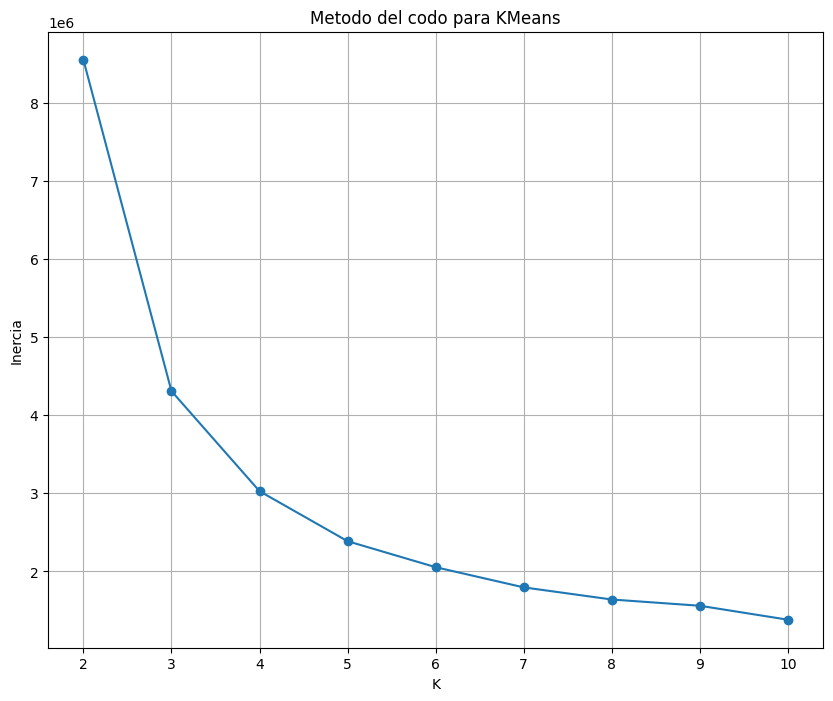

In [ ]:
df_km = df_scaled.select('features')
inertia = []

for k in range(2, 11):
  km = KMeans(k = k, seed = 42, featuresCol = 'features')
  km_model = km.fit(df_km)
  inertia.append(km_model.summary.trainingCost)
  print(f'Inercia para k = {k}: {km_model.summary.trainingCost}')

import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))
plt.plot(range(2, 11), inertia, marker = 'o')
plt.title('Metodo del codo para KMeans')
plt.xlabel('K')
plt.ylabel('Inercia')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [ ]:
k_optimo = 4
km = KMeans(k = k_optimo, seed = 42, featuresCol = 'features')
km_model = km.fit(df_km)
df_cluster = km_model.transform(df_km)

print(f'Centroides con {k_optimo} clusters')
for i, center in enumerate(km_model.clusterCenters()):
  print(f'Centroides {i + 1}: {center}')

print('\nConteo de puntos por cluster')
df_cluster.groupBy('prediction').count().show()

Centroides con 4 clusters
Centroides 1: [6.89016684e+00 2.82864004e-01 3.38119312e-01 6.67242164e+00
 4.82067745e-02 3.69908999e+01 1.44048028e+02 9.94384815e-01
 3.19393327e+00 4.91203236e-01 1.04099073e+01 5.92163802e+00]
Centroides 2: [ 8.27380427  0.49869757  0.2714496   2.44356144  0.08198896 12.58756439
 33.598234    0.99621201  3.2986755   0.63821192 10.57413539  5.68064753]
Centroides 3: [6.97189189e+00 2.93666667e-01 3.53918919e-01 9.33968468e+00
 5.18234234e-02 5.07166667e+01 1.97332883e+02 9.96290140e-01
 3.18300901e+00 5.14621622e-01 9.71355856e+00 5.55945946e+00]
Centroides 4: [6.96264881e+00 3.13273810e-01 3.12291667e-01 4.11626984e+00
 4.86061508e-02 2.51292163e+01 9.82673611e+01 9.93107019e-01
 3.20755952e+00 5.07271825e-01 1.09484292e+01 5.95287698e+00]

Conteo de puntos por cluster
+----------+-----+
|prediction|count|
+----------+-----+
|         1| 1359|
|         3| 2020|
|         2| 1106|
|         0| 1978|
+----------+-----+



### Ejercicio

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/sms-spam-collection-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'sms-spam-collection-dataset' dataset.
Path to dataset files: /kaggle/input/sms-spam-collection-dataset


In [3]:
import os
import pandas as pd

os.listdir(path)

dataset_path = os.path.join(path, 'spam.csv')

In [4]:
!pip install pyspark findspark

import findspark
from pyspark.sql import SparkSession
findspark.init()

spark = SparkSession.builder.appName("SMS_Spam_Detection").getOrCreate()
print('La sesion se creo exitosamente')

df = spark.read.csv(dataset_path, header=True, inferSchema=True)
df.show(5, truncate=False)

La sesion se creo exitosamente
+----+-----------------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+
|v1  |v2                                                                                                                                                         |_c2 |_c3 |_c4 |
+----+-----------------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+
|ham |Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            |NULL|NULL|NULL|
|ham |Ok lar... Joking wif u oni...                                                                                                                              |NULL|NULL|NULL|
|spam|Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text 

In [5]:
df.printSchema()

root
 |-- v1: string (nullable = true)
 |-- v2: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)



In [6]:
#Preprocesamiento de datos para Naive Bayes
#tokenizar
from pyspark.sql.functions import col, count
from pyspark.ml.feature import Tokenizer, StringIndexer, StopWordsRemover, CountVectorizer
from pyspark.ml.classification import NaiveBayes #(Recomendable para documentos con textos)
from pyspark.ml import Pipeline #es el proceso, se toma del ejemplo de una linea de ensamblaje, una serie de fases para construir el modelo y la validacion de los resultados
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#renombrar las columnas para tener mejor legibilidad
df = df.withColumnRenamed('v1', 'label').withColumnRenamed('v2', 'text')

df.show(5, truncate=False)

# Drop rows with null values in the 'text' column
df_noNull = df.filter(col('text').isNotNull()) #Filtrar solo los valores no nulos


#codificar la columna etiquetas (etiquetas numericas) tokenizar es darle un valor num a cada palabra
indexador = StringIndexer(inputCol='label', outputCol='label_index') #mapea las etiquetas
df_indexado = indexador.fit(df_noNull).transform(df_noNull)
tokenizador = Tokenizer(inputCol='text', outputCol='palabras')
df_tokenizado = tokenizador.transform(df_indexado)
removedor = StopWordsRemover(inputCol='palabras', outputCol='palabras_sin_stopwords')
df_sin_stopwords = removedor.transform(df_tokenizado)

#Vectorizacion de texto
vectorizador =  CountVectorizer(inputCol='palabras_sin_stopwords', outputCol='features')
modelo_vectorizado = vectorizador.fit(df_sin_stopwords)
df_caract = modelo_vectorizado.transform(df_sin_stopwords)

#Dividir los datos
df_train, df_test = df_caract.randomSplit([0.8, 0.2], seed=42)

#tamaño del conjunto de entrenamiento y prueba
print('Tamaño del conjunto de entrenamiento:', df_train.count(),' de mensajes dentro del grupo de entrenamiento')
print('Tamaño del conjunto de prueba:', df_test.count(),' de mensajes dentro del grupo de prueba')

+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+
|label|text                                                                                                                                                       |_c2 |_c3 |_c4 |
+-----+-----------------------------------------------------------------------------------------------------------------------------------------------------------+----+----+----+
|ham  |Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...                                            |NULL|NULL|NULL|
|ham  |Ok lar... Joking wif u oni...                                                                                                                              |NULL|NULL|NULL|
|spam |Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive en

In [7]:
#Crear y entrenar el modelo Naibe Bayes
nb = NaiveBayes(featuresCol='features', labelCol='label_index', modelType='multinomial')
modelo_nb = nb.fit(df_train)

#Predicciones del conjunto de prueba
predicciones = modelo_nb.transform(df_test)
predicciones.select('label','prediction','text').show(1072, truncate=False)

+-----+----------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|label|prediction|text                                                

In [8]:
#Evaluacion del modelo
evaluador = MulticlassClassificationEvaluator(labelCol='label_index', predictionCol='prediction', metricName='accuracy')
presicion = evaluador.evaluate(predicciones)
print(f'Presicion del modelo Naive Bayes: {presicion:.6f}')

Presicion del modelo Naive Bayes: 0.971055


In [9]:
matriz_confusion = predicciones.groupBy('label_index').pivot('prediction').count().fillna(0)
matriz_confusion.show()

+-----------+---+---+
|label_index|0.0|1.0|
+-----------+---+---+
|        0.0|898| 25|
|        1.0|  6|142|
+-----------+---+---+



In [10]:
#Analisis LDA
from pyspark.ml.clustering import LDA
from pyspark.ml.feature import IDF #Ponderar las palabras segun su importancia

#Preparacion de datos para LDA

idf = IDF(inputCol='features', outputCol='features_idf')
modelo_idf = idf.fit(df_caract)
df_idf = modelo_idf.transform(df_caract)

#Implementacion modelo LDA
lda= LDA(k=2,maxIter=10,featuresCol='features_idf')
modelo_lda = lda.fit(df_idf)

#Visualizacion e interpretacion de los topicos
topicos = modelo_lda.describeTopics(maxTermsPerTopic=10)
topicos.show(truncate=False)

+-----+-----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|topic|termIndices                        |termWeights                                                                                                                                                                                                                      |
+-----+-----------------------------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|0    |[0, 1, 4, 13, 16, 9, 19, 5, 57, 8] |[0.004587857509112132, 0.004015543278364399, 0.0029718075486539893, 0.0028092426842887134, 0.0027915716373911855, 0.002672742785742454, 0.002484045

In [11]:
#Vocabulario (Mapeo inverso)
vocabulario = modelo_vectorizado.vocabulary
print('Mapeo de indices a palabras del vocabulario')
for i in range(56):
  print(f'Indice{i} : {vocabulario[i]}')

spark.stop()

Mapeo de indices a palabras del vocabulario
Indice0 : u
Indice1 : call
Indice2 : 2
Indice3 : 
Indice4 : ur
Indice5 : get
Indice6 : &lt;#&gt;
Indice7 : go
Indice8 : 4
Indice9 : .
Indice10 : got
Indice11 : like
Indice12 : know
Indice13 : free
Indice14 : come
Indice15 : good
Indice16 : ?
Indice17 : send
Indice18 : want
Indice19 : text
Indice20 : time
Indice21 : ...
Indice22 : going
Indice23 : ok
Indice24 : love
Indice25 : need
Indice26 : r
Indice27 : still
Indice28 : txt
Indice29 : one
Indice30 : see
Indice31 : n
Indice32 : new
Indice33 : dont
Indice34 : tell
Indice35 : think
Indice36 : reply
Indice37 : mobile
Indice38 : take
Indice39 : back
Indice40 : stop
Indice41 : please
Indice42 : home
Indice43 : day
Indice44 : &
Indice45 : claim
Indice46 : �_
Indice47 : hi
Indice48 : hope
Indice49 : make
Indice50 : pls
Indice51 : me.
Indice52 : phone
Indice53 : give
Indice54 : now.
Indice55 : later
